In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA

In [3]:
def process_data(data):
  pca = PCA(n_components = 2)
  return pca.fit_transform(data)

In [5]:
def plot_dataset(data, target = None):
  fig, ax = plt.subplots(1, figsize = (10, 10))
  ax.scatter(data[:, 0], data[:, 1], c = target, cmap = plt.cm.Set1, edgecolor = 'k')
  plt.xlabel('Первый признак')
  plt.ylabel('Второй признак')
  plt.show()

In [19]:
def execute_data(data, epsnums):
  ys = []
  samplenums = np.arange(3, 10, 1)
  plt.figure(figsize = (20, 20))
  ax = []
  for samplenum in samplenums:
    for epsnum in epsnums:
        i = np.where(samplenums == samplenum)[0][0]
        j = np.where(epsnums == epsnum)[0][0]
        clf = DBSCAN(eps = epsnum, min_samples = samplenum)
        ys.append(clf.fit_predict(data))
        ax.append(plt.subplot2grid((7, 3), (i, j), colspan = 1))
        ax[-1].scatter(data[:, 0], data[:, 1], c = ys[-1], cmap = plt.cm.Set1, edgecolor = 'k')
        ax[-1].set_title('Для ' + str('%.2f' % samplenum) + ' minpts, ' + str('%.2f' % epsnum) + ' eps')
        ax[-1].set(xlabel = 'Первый признак', ylabel = 'Второй признак')
  plt.tight_layout()
  plt.show()

In [7]:
def add_noise(data):
  for row in data:
      if(np.random.randint(11) < 3):
          col = np.random.randint(2)
          row[col] += (np.random.randint(-1, 2) * 0.1 * row[col]) 

In [51]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [52]:
X = process_data(X)

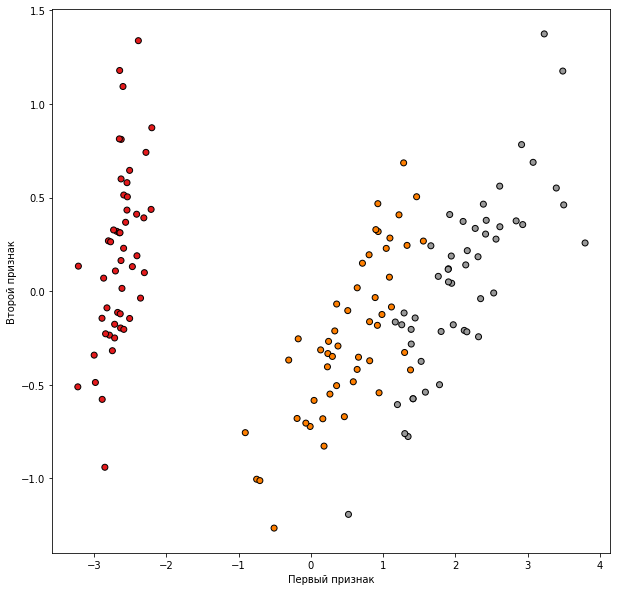

In [32]:
plot_dataset(X, y)

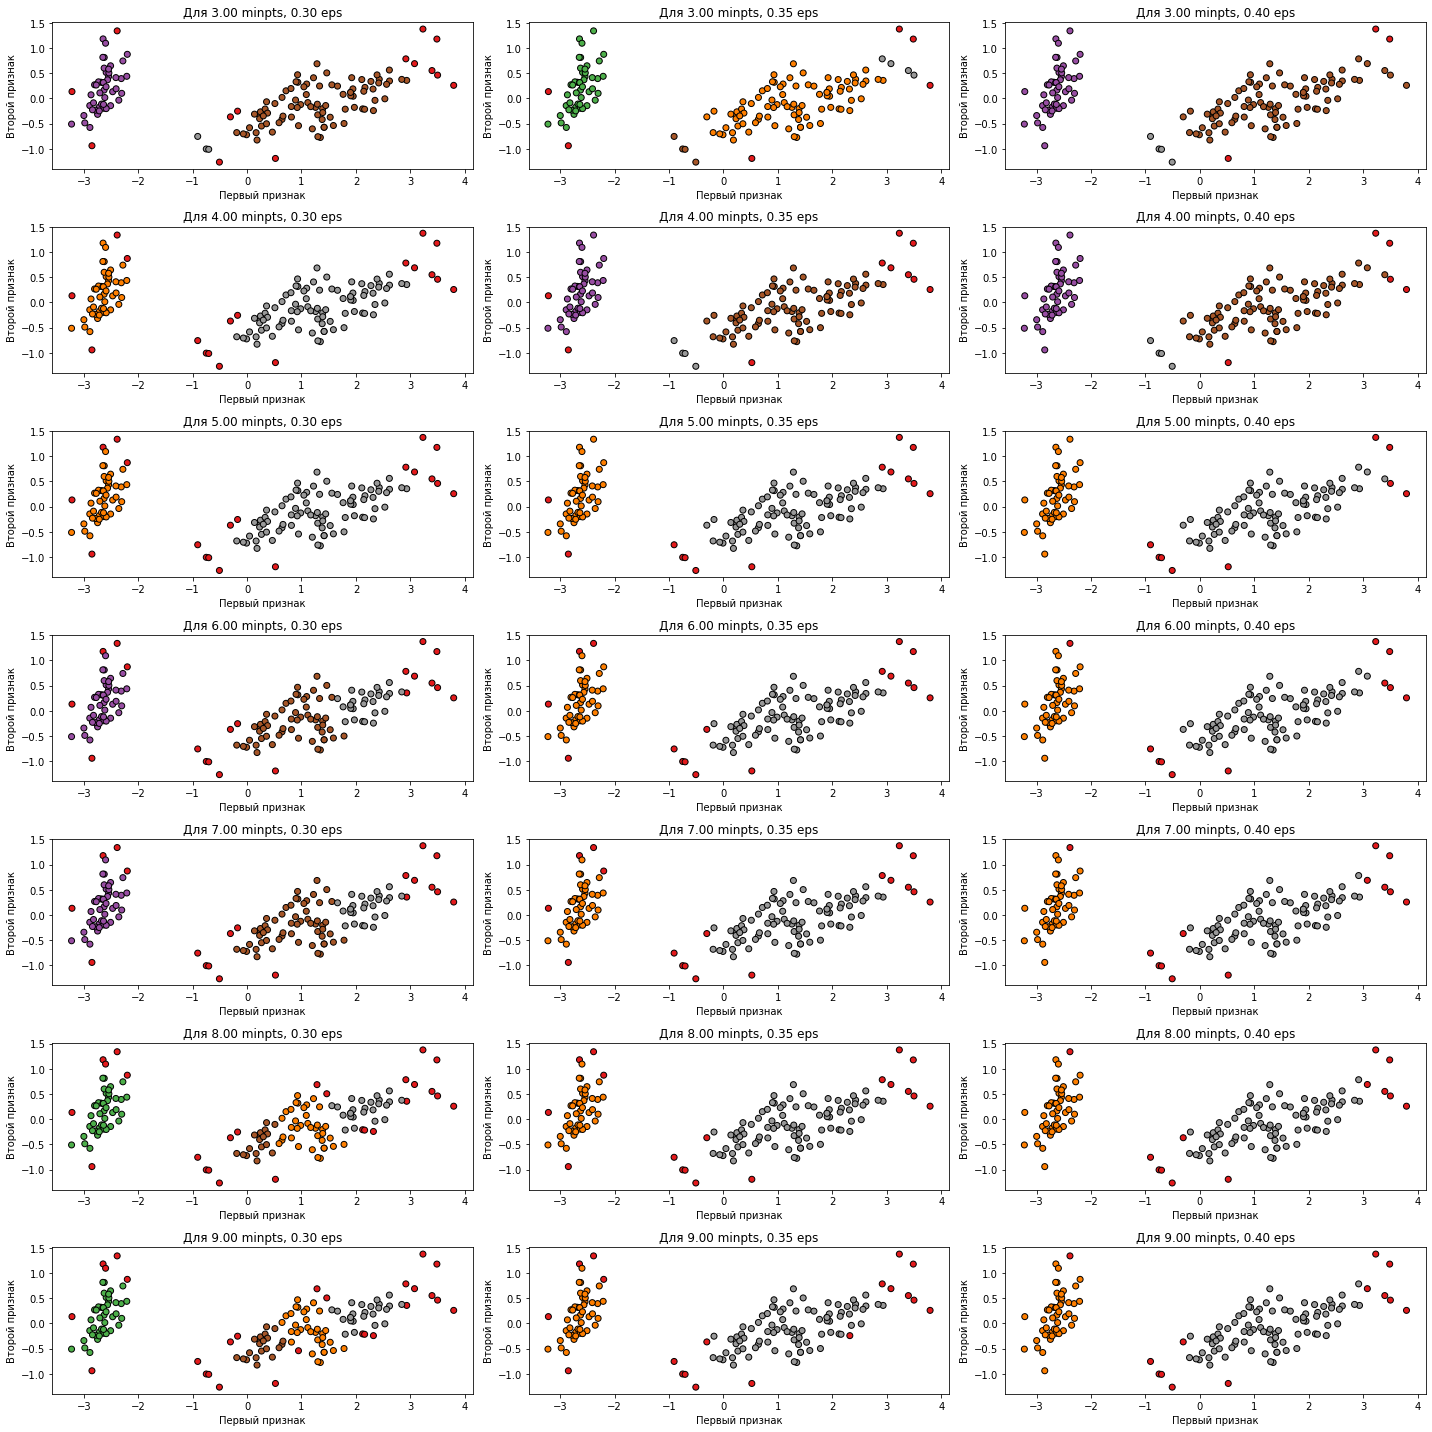

In [55]:
execute_data(X, np.arange(0.3, 0.41, 0.05))
# 0.2, 0.31, 0.05

In [36]:
digits = datasets.load_digits()
X = digits.data
y = digits.target

In [37]:
X = process_data(X)

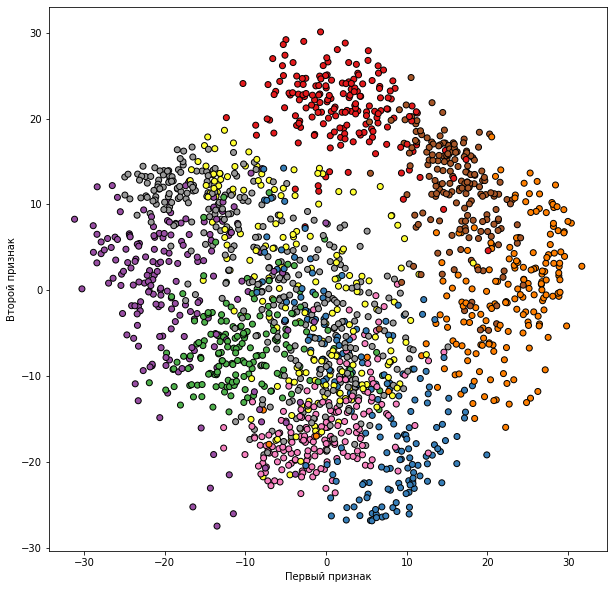

In [38]:
plot_dataset(X, y)

In [39]:
add_noise(X)

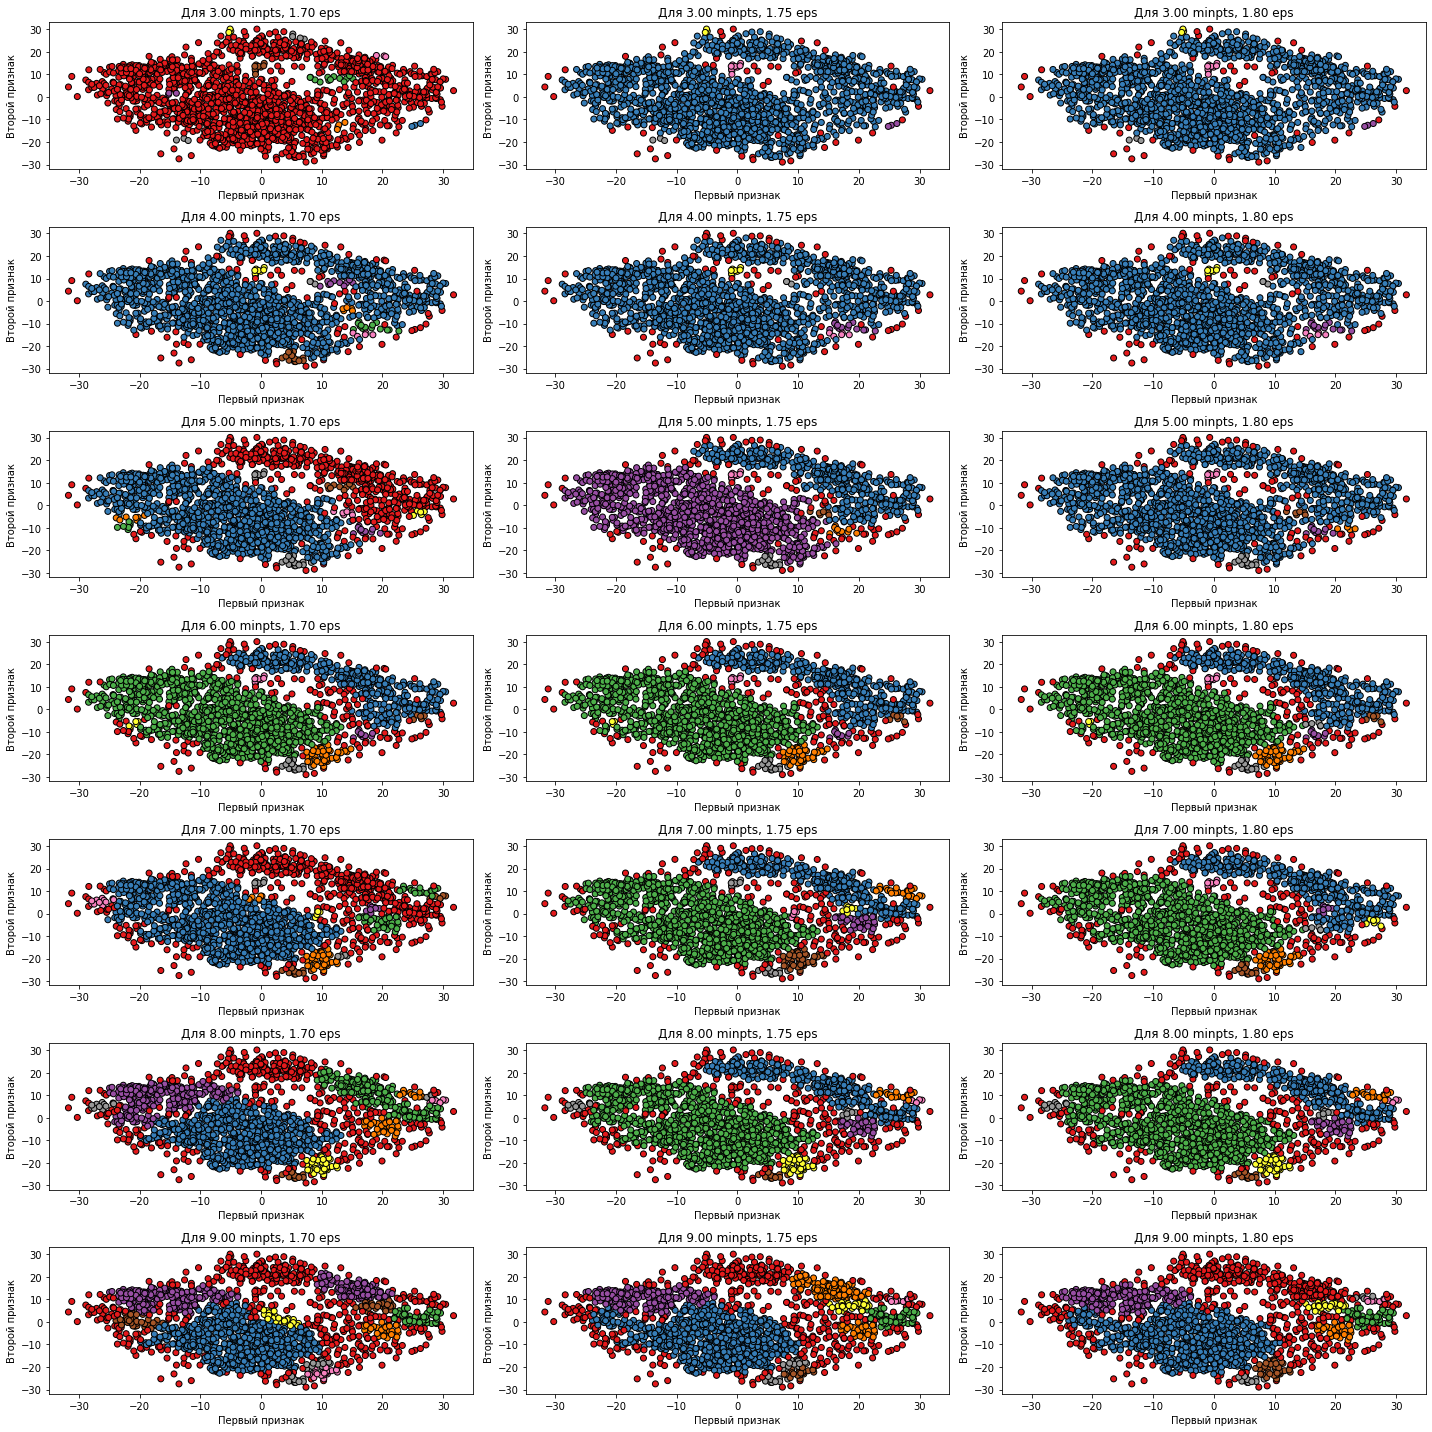

In [49]:
execute_data(X, np.arange(1.7, 1.81, 0.05))